In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [41]:
"""
Load data set 
"""
iris = datasets.load_iris()
X = iris['data']
Y = iris['target']
m,n = X.shape
k = len(np.unique(Y))
np.random.seed(0)
theta = np.random.randn(k,n)

In [42]:
#Convert target vector into one hot vector
def one_hot_y(y):
    Y_one_hot = np.zeros((m,k))
    Y_one_hot[np.arange(m),y] = 1
    return Y_one_hot
y = one_hot_y(Y)
   

In [43]:
#Add bias Term
X_with_bias = np.c_[np.ones(m),X]
theta_init = np.c_[np.zeros(k),theta]

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_with_bias,y,random_state = 0)

In [45]:
#Softmax Function
def softmax(z):
    a = np.exp(z)
    b = np.sum(a,axis = 1,keepdims = True)
    return a / b

In [49]:
def softmax_regression(X,y,theta,alpha):
    cost = []
    for i in range(5001):        
        z = np.dot(X,theta.T)
        h = softmax(z)
        J = (-1/m)*np.sum(np.sum(y*np.log(h),axis = 1))
        error = h - y
        grad = (1/m)*(np.dot(X.T,error))
        theta = theta -alpha*grad.T
        if i % 500 == 0:
            print(i, J)
        cost.append(J)
    pred = np.argmax(z,axis = 1)
    
    return theta_init,pred,cost

In [50]:
theta,train_pred , cost = softmax_regression(X_train,y_train,theta_init,0.01)

0 6.567044811388259
500 0.3324507880520422
1000 0.26836806545779157
1500 0.23402368790906017
2000 0.2097999818761135
2500 0.19115423895792424
3000 0.1762021119311379
3500 0.1639040391421737
4000 0.15359947909277713
4500 0.1448363661071226
5000 0.1372912507896701


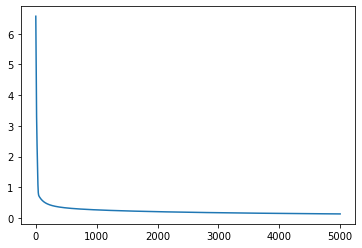

In [51]:
plt.plot(cost)
plt.show()

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 1,
       2, 0])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [22]:
def train(X,y,alpha):
    theta_init = np.c_[np.zeros(k),theta]
    cost = []
    for i in range(1000):
        z = np.dot(theta,X.T).T
        h = softmax(z)
        ln_mult = y*np.log(h)
        J = -(1/m)*np.sum(np.sum(ln_mult,axis = 1))
        error = h - y
        grad = (1/m)*error.T.dot(X_with_bias)
        theta_init = theta_init -alpha*grad
        cost.append(J)
    return (h > 0.5).astype(int),cost,theta_init

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_with_bias,y,random_state = 0)

In [24]:
pred_train,cost,theta = train(X_train,y_train,0.01)

ValueError: shapes (3,4) and (5,112) not aligned: 4 (dim 1) != 5 (dim 0)

((112, 5), (3, 5))